 ## Probabilidad Precio Umbral.
 
 >El objetivo de esta función es analizar 4 empresas concreteras a nivel mundial .
Se realizaron 1000 escenarios en un periodo de tiempo de 252 días para determinar la tendencia de las acciones.

> Se Calcularan las probabilidades con base en una tasa de interés anual deseada del 10\% de cada una de las empresas.




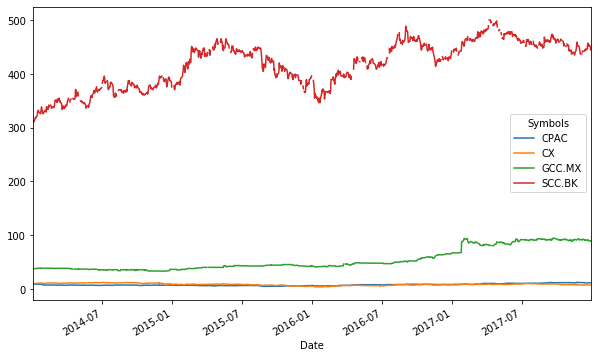

In [63]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def get_closes(names,start,end):
    closes = web.DataReader(name=names,data_source="yahoo",start=start,end=end)
    return closes["Adj Close"] 
names = ['CX','GCC.MX',"SCC.BK","CPAC"]
start, end = '2014-01-01', '2017-12-31'
closes = get_closes(names,start,end)
closes.plot(figsize=(10,6));



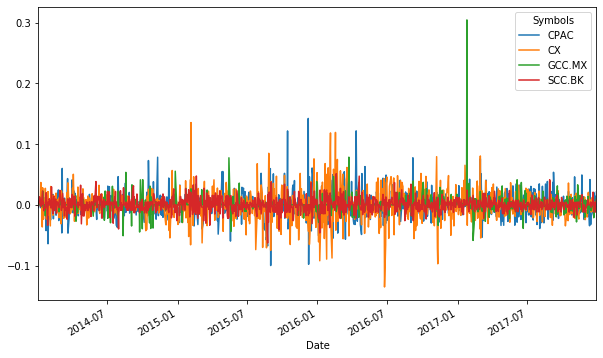

In [6]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [59]:
mu_CX, mu_GCC, mu_SCC, mu_CPAC = ret.mean().CX, ret.mean()["GCC.MX"], ret.mean()["SCC.BK"], ret.mean().CPAC
std_CX, std_GCC, std_SCC, std_CPAC = ret.std().CX, ret.std()["GCC.MX"], ret.std()["SCC.BK"], ret.std().CPAC 

mu_CX, mu_GCC, mu_SCC, mu_CPAC, std_CX,std_GCC, std_SCC, std_CPAC

(2.905435433225278e-05,
 0.000928946479130383,
 0.00042309135937029996,
 0.0004891426678623204,
 0.02407426639804187,
 0.014051397960442738,
 0.011757632217165411,
 0.020344010658596645)

In [60]:
def ret_sim(mu,sigma,ndays,nscen,start_date):
    dates = pd.date_range(start = start_date,periods=ndays)
    rend_sim = sigma*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(index = dates, data = rend_sim)
simret_CX = ret_sim(mu_CX, std_CX, 252, 1000, '2018-01-01')
simret_GCC = ret_sim(mu_GCC ,std_GCC , 252, 1000, '2018-01-01')
simret_SCC = ret_sim(mu_SCC ,std_SCC , 252, 1000, '2018-01-01')
simret_CPAC = ret_sim(mu_CPAC ,std_CPAC , 252, 1000, '2018-01-01')


In [48]:
simcloses_CX = closes.iloc[-1].CX*((1+simret_CX).cumprod())
simcloses_GCC = closes.iloc[-1]["GCC.MX"]*((1+simret_GCC).cumprod())
simcloses_SCC = closes.iloc[-1]["SCC.BK"]*((1+simret_GCC).cumprod())
simcloses_CPAC= closes.iloc[-1].CPAC*((1+simret_CPAC).cumprod())

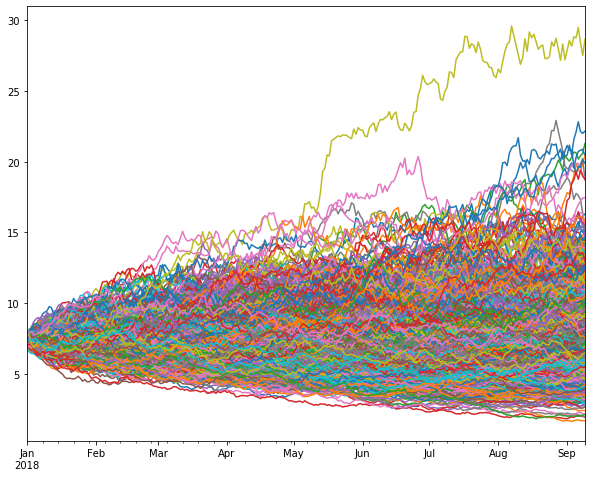

In [41]:
simcloses_CX.plot(figsize=(10,8),legend=False);

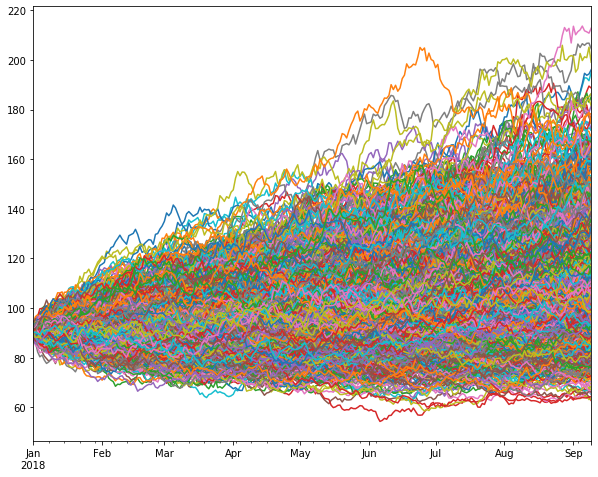

In [49]:
simcloses_GCC.plot(figsize=(10,8),legend=False);

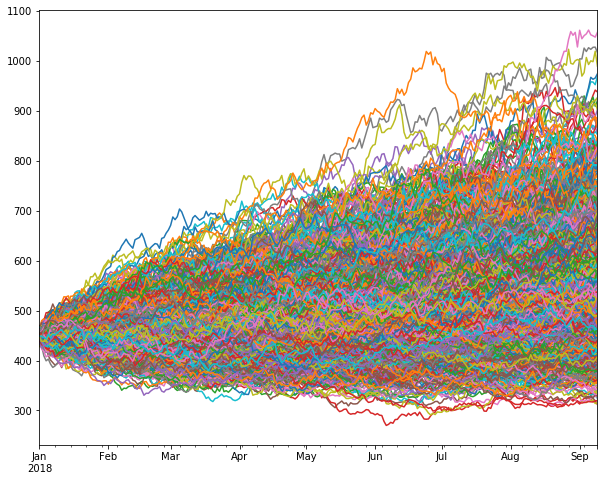

In [50]:
simcloses_SCC.plot(figsize=(10,8),legend=False);

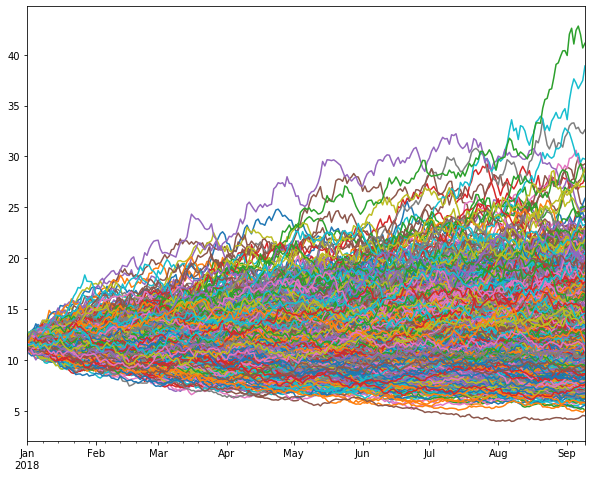

In [51]:
simcloses_CPAC.plot(figsize=(10,8),legend=False);

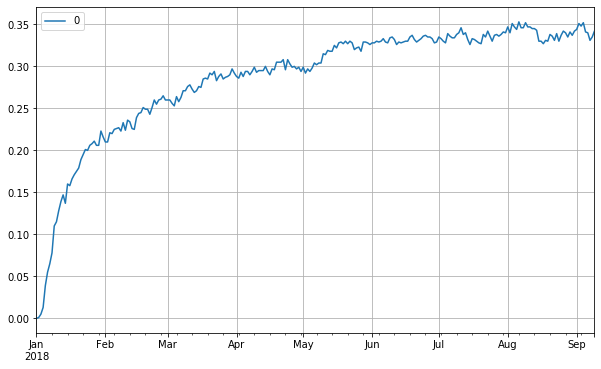

In [52]:
K_CX = (1+0.1)*closes.iloc[-1].CX
DF = simcloses_CX>K_CX
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

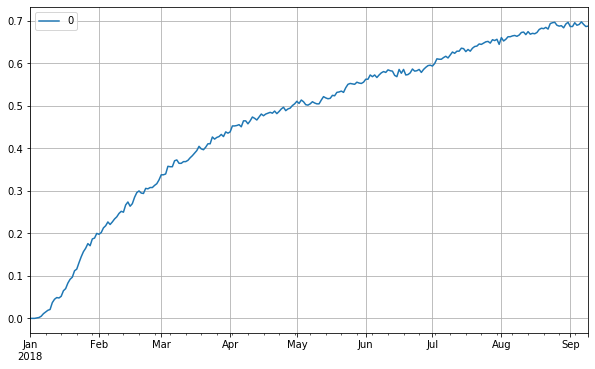

In [54]:
K_GCC = (1+0.1)*closes.iloc[-1]["GCC.MX"]
DF = simcloses_GCC>K_GCC
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

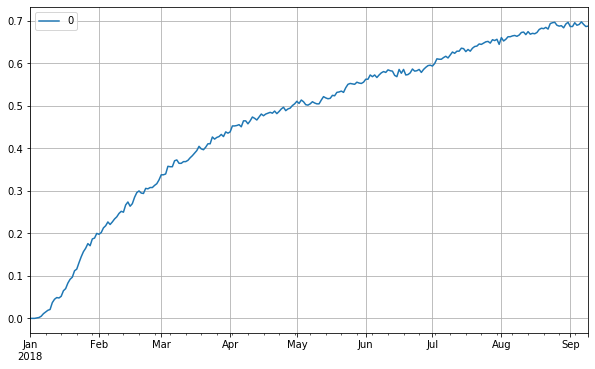

In [55]:
K_SCC = (1+0.1)*closes.iloc[-1]["SCC.BK"]
DF = simcloses_SCC>K_SCC
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

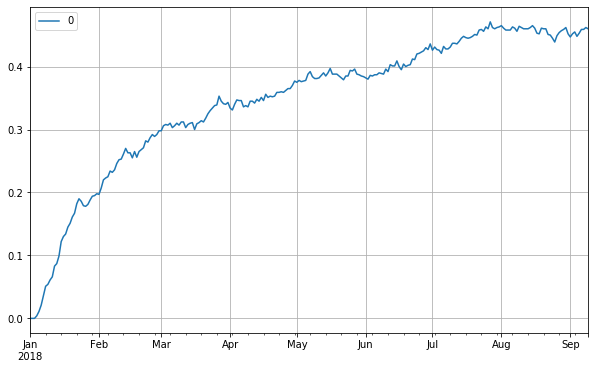

In [56]:
K_CPAC = (1+0.1)*closes.iloc[-1].CPAC
DF = simcloses_CPAC>K_CPAC
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);